### Tutorial: Solving 2D Poisson's equation:
#### Using: Jacobi, Gauss-Seidel, Red-Black Gauss-Seidel, SOR
#### including L2 Norm


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Jacobi_2D(sol,B,tol):
    Niter,Nx,Ny = sol.shape
    iter = 1
    L2_norm = 1
    while(L2_norm>tol and iter<Niter):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = 0.25*(-B[i,j] + (sol[iter-1,i+1,j]+sol[iter-1,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter-1,i,j-1]))
        L2_norm = L2_norm_func(sol,iter)
        iter = iter+1
    print("Jacobi: ",iter-1,L2_norm)
    return sol,iter-1

In [3]:
def Gauss_Seidel_2D(sol,B,tol):
    Niter,Nx,Ny = sol.shape
    iter = 1
    L2_norm = 1
    while(L2_norm>tol and iter<Niter):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = 0.25*(-B[i,j] + sol[iter-1,i+1,j]+sol[iter,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter,i,j-1])
        L2_norm = L2_norm_func(sol,iter)
        iter = iter+1
    print("Gauss-Seidel: ",iter-1,L2_norm)
    return sol,iter-1

In [4]:
def Red_Black_Gauss_Seidel_2D(sol,B,tol):
    Niter,Nx,Ny = sol.shape
    iter = 1
    L2_norm = 1
    while(L2_norm>tol and iter<Niter):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2==0:
                    sol[iter,i,j] = 0.25*(-B[i,j] + sol[iter-1,i+1,j]+sol[iter-1,i-1,j]
                                          +sol[iter-1,i,j+1]+sol[iter-1,i,j-1])
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2!=0:
                    sol[iter,i,j] = 0.25*(-B[i,j] + sol[iter,i+1,j]+sol[iter,i-1,j]
                                          +sol[iter,i,j+1]+sol[iter,i,j-1])
        L2_norm = L2_norm_func(sol,iter)
        iter = iter+1
    print("RB-Gauss_Seidel: ",iter-1,L2_norm)
    return sol,iter-1

In [5]:
def SOR_2D(sol,B,tol,omega):
    Niter,Nx,Ny = sol.shape
    iter = 1
    L2_norm = 1
    while(L2_norm>tol and iter<Niter):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = omega*(0.25*(-B[i,j] + sol[iter-1,i+1,j]+sol[iter,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter,i,j-1])) + (1-omega)*sol[iter-1,i,j]
        L2_norm = L2_norm_func(sol,iter)
        iter = iter+1
    print("SOR: ",iter-1,L2_norm)
    return sol,iter-1

In [6]:
def L2_norm_func(sol,iter):
    summation = 0
    for i in range(0,Nx,1):
        for j in range(0,Ny,1):
            summation = summation + (sol[iter,i,j]-sol[iter-1,i,j])**2
    L2_norm = np.sqrt(summation/(Nx*Ny))
    return L2_norm

In [7]:
Nx    = 100
Ny    = 100
xmax  = 10
xmin  = 0
ymax  = 10
ymin  = 0
Niter = 400
tol   = 1e-4
omega = 0.5

x     = np.linspace(xmin,xmax,Nx)
y     = np.linspace(ymin,ymax,Ny)

x_mesh,y_mesh = np.meshgrid(x,y)

sol                = np.zeros(((Niter,len(x),len(y))))
sol[0,Nx//2,Ny//2] = 1.0

sol_GS                = np.zeros(((Niter,len(x),len(y))))
sol_GS[0,Nx//2,Ny//2] = 1.0


sol_SOR                = np.zeros(((Niter,len(x),len(y))))
sol_SOR[0,Nx//2,Ny//2] = 1.0

sol_RB_GS                = np.zeros(((Niter,len(x),len(y))))
sol_RB_GS[0,Nx//2,Ny//2] = 1.0

In [8]:
xc = x[Nx//2]
yc = y[Ny//2]
dx = x[1]-x[0]

B  = np.zeros((len(x),len(y)))
B  = dx**2*np.exp(-((x_mesh-xc)**2 + (y_mesh-yc)**2))

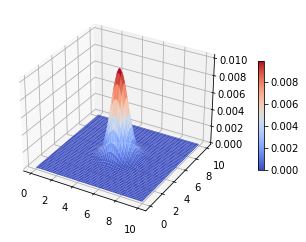

In [9]:
fig  = plt.figure(0)
axes = fig.add_subplot(projection='3d')
surf = axes.plot_surface(x_mesh, y_mesh, B, cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.1)
plt.show()

In [10]:
sol,iter_J           = Jacobi_2D(sol, B, tol)
sol_GS,iter_GS       = Gauss_Seidel_2D(sol_GS, B, tol)
sol_RB_GS,iter_RB_GS = Red_Black_Gauss_Seidel_2D(sol_RB_GS, B, tol)
sol_SOR,iter_SOR     = SOR_2D(sol_SOR, B, tol, omega)

Jacobi:  399 0.0004236677831386586
Gauss-Seidel:  399 0.0002079226002080353
RB-Gauss_Seidel:  399 0.00020780315313624324
SOR:  399 0.00010982256719630325


<IPython.core.display.Javascript object>


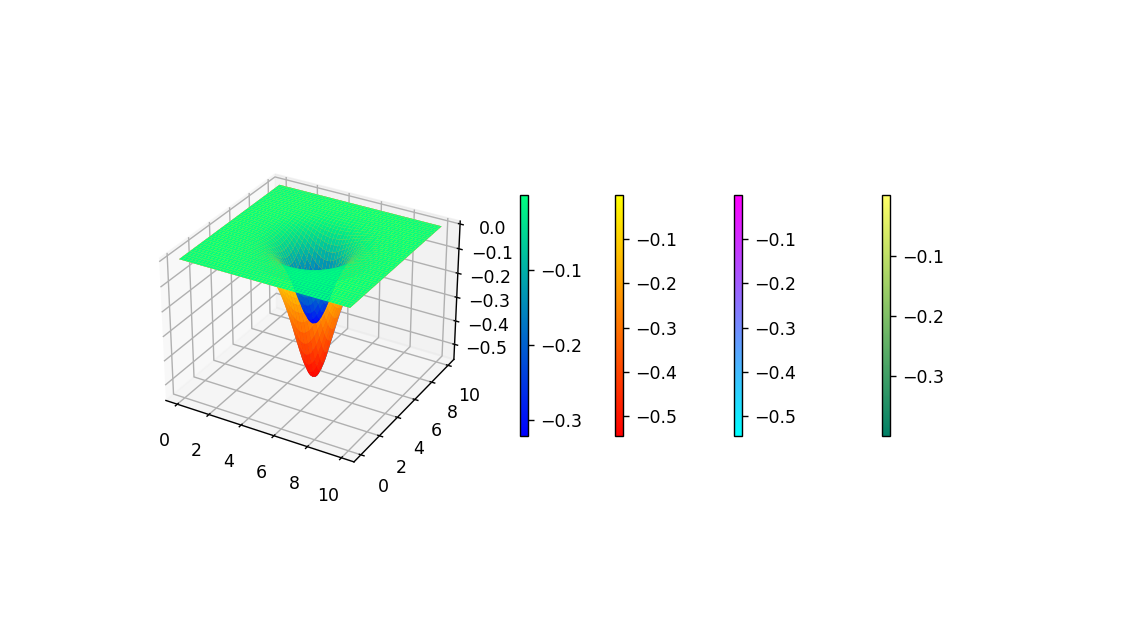

In [11]:
%matplotlib notebook
fig  = plt.figure(figsize=(9,5))
axes = fig.add_subplot(projection='3d')
surf1 = axes.plot_surface(x_mesh, y_mesh, sol[iter_J],          cmap='summer')
surf2 = axes.plot_surface(x_mesh, y_mesh, sol_GS[iter_GS],      cmap='cool')
surf3 = axes.plot_surface(x_mesh, y_mesh, sol_RB_GS[iter_RB_GS],cmap='autumn')
surf4 = axes.plot_surface(x_mesh, y_mesh, sol_SOR[iter_SOR],    cmap='winter')

fig.colorbar(surf1, shrink=0.5, aspect=30)
fig.colorbar(surf2, shrink=0.5, aspect=30)
fig.colorbar(surf3, shrink=0.5, aspect=30)
fig.colorbar(surf4, shrink=0.5, aspect=30, pad= 0.1)
plt.show()